In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./ted-talks/ted_main.csv")

In [3]:
from ast import literal_eval

df['tags'] = df['tags'].apply(literal_eval)

In [4]:
climate_df = df[df.title.str.contains('climate', case=False)]
climate_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
51,499,"Given $50 billion to spend, which would you so...",1001,TED2005,1107302400,32,Bjorn Lomborg,Bjorn Lomborg: Global priorities bigger than c...,1,1167696660,"[{'id': 3, 'name': 'Courageous', 'count': 283}...","[{'id': 248, 'hero': 'https://pe.tedcdn.com/im...",Global prioritizer,"[AIDS, Africa, business, choice, climate chang...",Global priorities bigger than climate change,https://www.ted.com/talks/bjorn_lomborg_sets_g...,1391142
160,279,Environmental scientist David Keith proposes a...,958,TEDSalon 2007 Hot Science,1189296000,24,David Keith,David Keith: A critical look at geoengineering...,1,1194918240,"[{'id': 8, 'name': 'Informative', 'count': 680...","[{'id': 193, 'hero': 'https://pe.tedcdn.com/im...",Environmental scientist,"[business, china, climate change, engineering,...",A critical look at geoengineering against clim...,https://www.ted.com/talks/david_keith_s_surpri...,876658
214,664,In this brand-new slideshow (premiering on TED...,1674,TED2008,1204502400,44,Al Gore,Al Gore: New thinking on the climate crisis,1,1207618020,"[{'id': 8, 'name': 'Informative', 'count': 105...","[{'id': 128, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[activism, climate change, global issues, scie...",New thinking on the climate crisis,https://www.ted.com/talks/al_gore_s_new_thinki...,1751426
550,124,"In 4 minutes, atmospheric chemist Rachel Pike ...",253,TEDGlobal 2009,1248393600,31,Rachel Pike,Rachel Pike: The science behind a climate head...,1,1257843720,"[{'id': 22, 'name': 'Fascinating', 'count': 10...","[{'id': 594, 'hero': 'https://pe.tedcdn.com/im...",Atmospheric chemist,"[chemistry, climate change, environment, globa...",The science behind a climate headline,https://www.ted.com/talks/rachel_pike_the_scie...,470615


In [5]:
from  itertools import chain

df2 = pd.DataFrame({
        "title": np.repeat(climate_df.title.values, climate_df.tags.str.len()),
        "tag": list(chain.from_iterable(climate_df.tags))})

In [6]:
df2.head()

,tag,title
0,alternative energy,Averting the climate crisis
1,cars,Averting the climate crisis
2,climate change,Averting the climate crisis
3,culture,Averting the climate crisis
4,environment,Averting the climate crisis


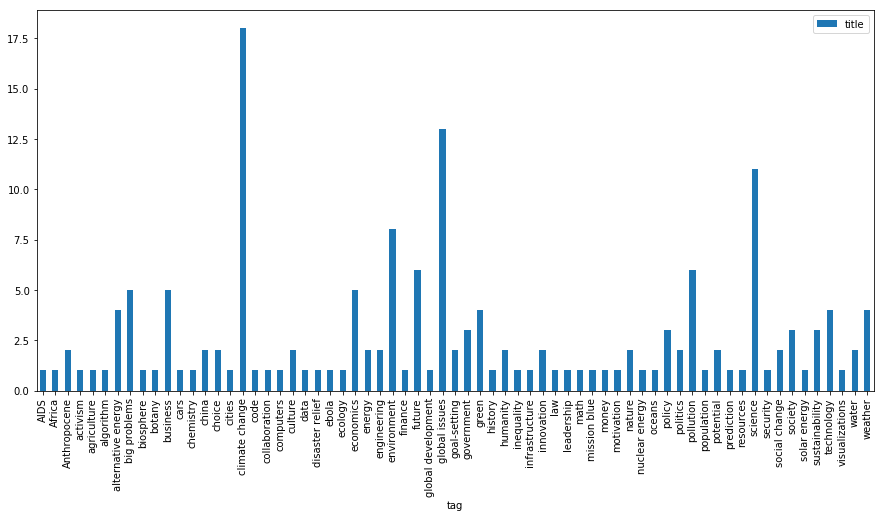

In [7]:
df2.groupby("tag").count().plot(kind="bar", figsize=(15, 7))

In [8]:
transcript_df = pd.read_csv('./ted-talks/transcripts.csv')

In [24]:
climate_transcripts_df = climate_df.merge(transcript_df, how='inner', left_on='url', right_on='url')

In [32]:
climate_transcripts = climate_transcripts_df["transcript"]

In [35]:
climate_transcripts = climate_transcripts.str.replace(",", "")
climate_transcripts = climate_transcripts.str.replace(".", "")
climate_transcripts = climate_transcripts.str.lower()

In [36]:
split_df = climate_transcripts.str.split()

In [37]:
split_df.head()

0    [thank, you, so, much, chris, and, it's, truly...
1    [what, i'd, like, to, talk, about, is, really,...
2    [you've, all, seen, lots, of, articles, on, cl...
3    [i, have, given, the, slide, show, that, i, ga...
4    [i'd, like, to, talk, to, you, today, about, t...
Name: transcript, dtype: object

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
stopwords = set(STOPWORDS)

In [18]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=42)

In [26]:
w = wordcloud.generate(str(climate_transcripts_df['transcript']))

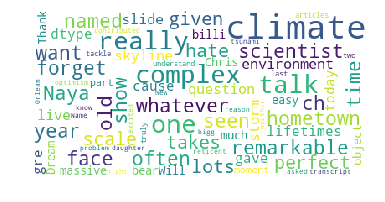

In [31]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()